# NPS Visual Exploration

## 00. Table of Contents
01. Importing Libraries
02. Importing Data
03. Data Consistency Checks
04. Subsetting for Visualization
05. Correlation Heatmap
06. Scatterplots
07. Pair chart
08. Categorical Plots
09. Hypotheses

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#checking matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
%matplotlib inline

## 02. Importing Data

In [4]:
path = r'C:\Users\kensz\OneDrive\Desktop\CF Data Analytics Course\Achievment 6\01-2023 NPS Analysis'

In [5]:
df_nps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'NPS_noaa_merged.csv'))

## 03. Data Consistency Checks

In [6]:
df_nps.columns

Index(['Unnamed: 0', 'Data Grain', 'Park', 'Unit Code', 'Park Type', 'Region',
       'State', 'Year', 'Month', 'Recreation Visits', 'Non-Recreation Visits',
       'Recreation Hours', 'Non-Recreation Hours', 'Concessioner Lodging',
       'Concessioner Camping', 'Tent Campers', 'RV Campers',
       'Backcountry Campers', 'Non-Recreation Overnight Stays',
       'Misc. Overnight Stays', 'Monthly Avg Temp'],
      dtype='object')

In [7]:
df_nps.isnull().sum()

Unnamed: 0                        0
Data Grain                        0
Park                              0
Unit Code                         0
Park Type                         0
Region                            0
State                             0
Year                              0
Month                             0
Recreation Visits                 0
Non-Recreation Visits             0
Recreation Hours                  0
Non-Recreation Hours              0
Concessioner Lodging              0
Concessioner Camping              0
Tent Campers                      0
RV Campers                        0
Backcountry Campers               0
Non-Recreation Overnight Stays    0
Misc. Overnight Stays             0
Monthly Avg Temp                  0
dtype: int64

In [8]:
df_nps = df_nps.drop(columns = ['Unnamed: 0'])

In [9]:
df_nps.head()

Data Grain                            Park Unit Code  \
0  ABLI-2011-01  Abraham Lincoln Birthplace NHP      ABLI   
1  CUGA-2011-01              Cumberland Gap NHP      CUGA   
2  MACA-2011-01                 Mammoth Cave NP      MACA   
3  ABLI-2011-02  Abraham Lincoln Birthplace NHP      ABLI   
4  CUGA-2011-02              Cumberland Gap NHP      CUGA   

                  Park Type      Region State  Year  Month  Recreation Visits  \
0  National Historical Park  Southeast     KY  2011      1               2643   
1  National Historical Park  Southeast     KY  2011      1              39785   
2             National Park  Southeast     KY  2011      1               6889   
3  National Historical Park  Southeast     KY  2011      2               3647   
4  National Historical Park  Southeast     KY  2011      2              36010   

   Non-Recreation Visits  Recreation Hours  Non-Recreation Hours  \
0                      0              2643                     0   
1                 650766             50327                650766   
2                  11300             33275                 11300   
3                      0              3647                     0   
4                 488291             48136                488291   

   Concessioner Lodging  Concessioner Camping  Tent Campers  RV Campers  \
0                     0                     0             0           0   
1                     0                     0             0           0   
2                     0                     0            56          24   
3                     0                     0             0           0   
4                     0                     0             0           0   

   Backcountry Campers  Non-Recreation Overnight Stays  Misc. Overnight Stays  \
0                    0                               0                      0   
1                   63                               0                      0   
2                   83                               0                      0   
3                    0                               0                      0   
4                   21                               0                      0   

   Monthly Avg Temp  
0              30.2  
1              30.2  
2              30.2  
3              39.1  
4              39.1

In [10]:
df_nps_dups = df_nps[df_nps.duplicated()]

In [11]:
df_nps_dups.shape

(0, 20)

In [12]:
df_nps.dtypes

Data Grain                         object
Park                               object
Unit Code                          object
Park Type                          object
Region                             object
State                              object
Year                                int64
Month                               int64
Recreation Visits                   int64
Non-Recreation Visits               int64
Recreation Hours                    int64
Non-Recreation Hours                int64
Concessioner Lodging                int64
Concessioner Camping                int64
Tent Campers                        int64
RV Campers                          int64
Backcountry Campers                 int64
Non-Recreation Overnight Stays      int64
Misc. Overnight Stays               int64
Monthly Avg Temp                  float64
dtype: object

## 04. Subsetting Data for visualizations

In [13]:
df_sub = df_nps[['Recreation Visits', 'Non-Recreation Visits',
       'Recreation Hours', 'Non-Recreation Hours', 'Concessioner Lodging',
       'Concessioner Camping', 'Tent Campers', 'RV Campers',
       'Backcountry Campers', 'Non-Recreation Overnight Stays',
       'Misc. Overnight Stays', 'Monthly Avg Temp']]

## 05. Creating a Correlation Heatmap

In [14]:
df_sub.columns

Index(['Recreation Visits', 'Non-Recreation Visits', 'Recreation Hours',
       'Non-Recreation Hours', 'Concessioner Lodging', 'Concessioner Camping',
       'Tent Campers', 'RV Campers', 'Backcountry Campers',
       'Non-Recreation Overnight Stays', 'Misc. Overnight Stays',
       'Monthly Avg Temp'],
      dtype='object')

In [15]:
df_sub.corr()

Recreation Visits  Non-Recreation Visits  \
Recreation Visits                        1.000000               0.307341   
Non-Recreation Visits                    0.307341               1.000000   
Recreation Hours                         0.760380               0.139441   
Non-Recreation Hours                     0.307341               1.000000   
Concessioner Lodging                     0.302352               0.013168   
Concessioner Camping                     0.218814               0.025378   
Tent Campers                             0.402016               0.039444   
RV Campers                               0.445176               0.056848   
Backcountry Campers                      0.350728               0.033528   
Non-Recreation Overnight Stays           0.109656              -0.004187   
Misc. Overnight Stays                    0.112233              -0.001218   
Monthly Avg Temp                         0.169128               0.048906   

                                Recreation Hours  Non-Recreation Hours  \
Recreation Visits                       0.760380              0.307341   
Non-Recreation Visits                   0.139441              1.000000   
Recreation Hours                        1.000000              0.139441   
Non-Recreation Hours                    0.139441              1.000000   
Concessioner Lodging                    0.686960              0.013168   
Concessioner Camping                    0.491939              0.025378   
Tent Campers                            0.650289              0.039444   
RV Campers                              0.660109              0.056848   
Backcountry Campers                     0.619178              0.033528   
Non-Recreation Overnight Stays          0.131957             -0.004187   
Misc. Overnight Stays                   0.246659             -0.001218   
Monthly Avg Temp                        0.131420              0.048906   

                                Concessioner Lodging  Concessioner Camping  \
Recreation Visits                           0.302352              0.218814   
Non-Recreation Visits                       0.013168              0.025378   
Recreation Hours                            0.686960              0.491939   
Non-Recreation Hours                        0.013168              0.025378   
Concessioner Lodging                        1.000000              0.620758   
Concessioner Camping                        0.620758              1.000000   
Tent Campers                                0.574903              0.132394   
RV Campers                                  0.541479              0.159988   
Backcountry Campers                         0.590736              0.208257   
Non-Recreation Overnight Stays              0.004960              0.057211   
Misc. Overnight Stays                       0.081960              0.117420   
Monthly Avg Temp                            0.057007              0.028061   

                                Tent Campers  RV Campers  Backcountry Campers  \
Recreation Visits                   0.402016    0.445176             0.350728   
Non-Recreation Visits               0.039444    0.056848             0.033528   
Recreation Hours                    0.650289    0.660109             0.619178   
Non-Recreation Hours                0.039444    0.056848             0.033528   
Concessioner Lodging                0.574903    0.541479             0.590736   
Concessioner Camping                0.132394    0.159988             0.208257   
Tent Campers                        1.000000    0.849266             0.628842   
RV Campers                          0.849266    1.000000             0.562548   
Backcountry Campers                 0.628842    0.562548             1.000000   
Non-Recreation Overnight Stays      0.068671    0.159172             0.199994   
Misc. Overnight Stays               0.065067    0.060890             0.122214   
Monthly Avg Temp                    0.115538    0.108007             0.090719   

           

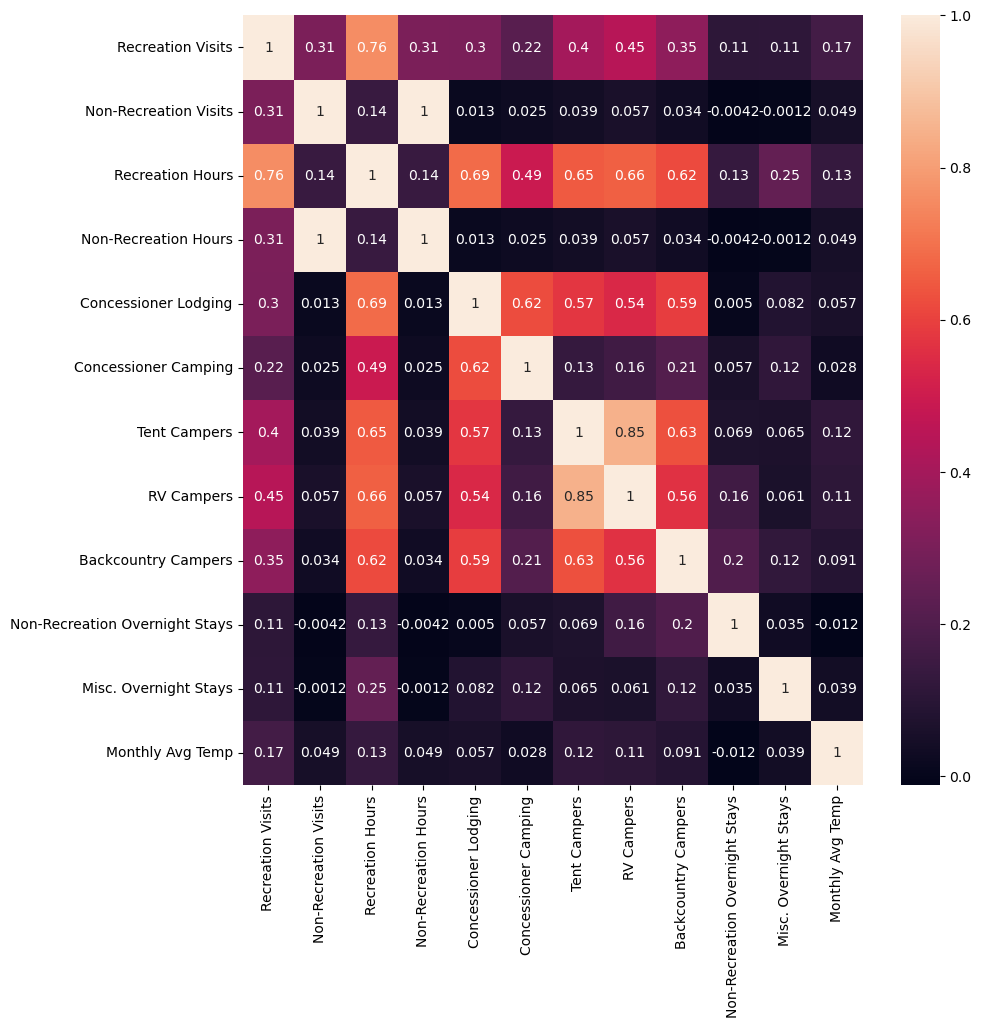

In [16]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

## 06. Creating a Scatterplot

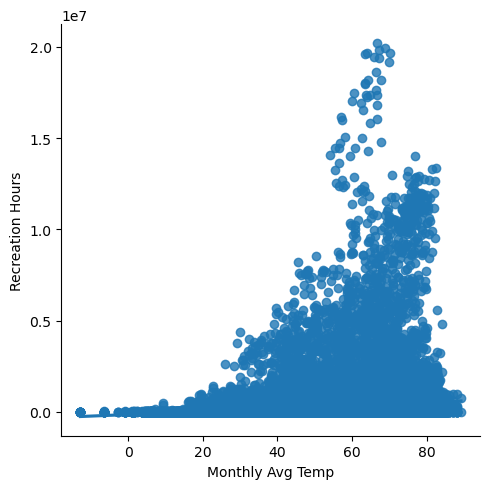

In [23]:
#creating a scatter plot for Recreation Visits and Recreation Hours

sns.lmplot(x = 'Monthly Avg Temp', y = 'Recreation Hours', data = df_nps)

This chart shows that there is a relationship between the monthyl average temperature and the recreation hours. As the temperature goes up, there is an increase in the amount of recreation hours. This peaks inbetween 50 and 60 degrees, and is not the only contributing factor as there are still low recreation hours at "ideal temperatures". 

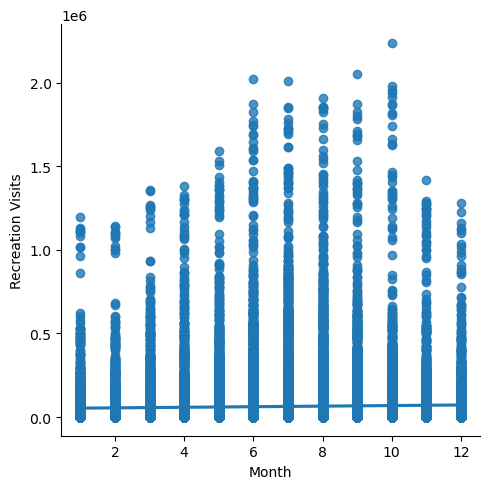

In [18]:
#creating a scatterplot for Month and Recreation Visits

sns.lmplot(x = 'Month', y = 'Recreation Visits', data = df_nps)

This scatterplot between Month and Recreation visits confirms an initial theory that summer was when the most visits occur. This chart shows recreational visits peak between June and October, and then they fall between November and May. 

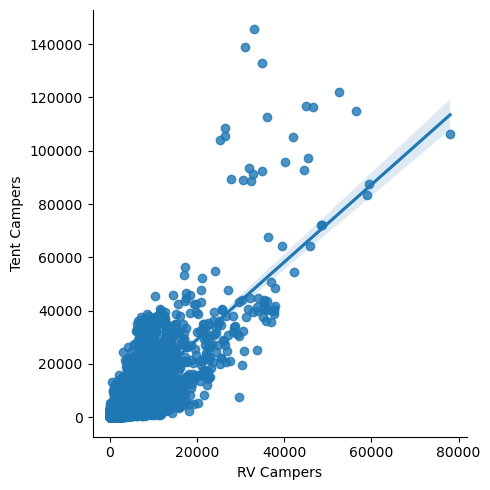

In [19]:
sns.lmplot(x = 'RV Campers', y = 'Tent Campers', data = df_nps)

In the relationship between RV campers and Tent Campers there is a positive correlation. As RV camper numbers increase, generally Tent Camper numbers increase as well. This is likely because RV Camping and Tent Camping both require similar weather and conditions to be desirable, therefore what is good for one is good for the other. 

Addtionally, there is a cluster at around 3000 RV Campers where the tent campers are much higher than expected. One possible explanation is that some parks have a limited number of RV spaces, so demand for camping exceeded the availability of the RV campsites leading to more Tent campers. Looking into the origins of those data points, and the park polocies of those parks would help confirm or deny this hypothesis. 

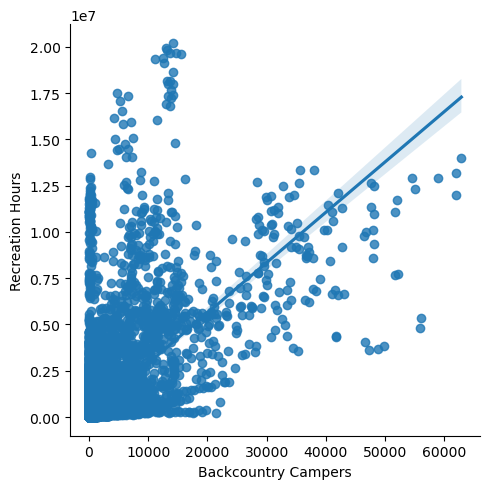

In [20]:
sns.lmplot(x = 'Backcountry Campers', y= 'Recreation Hours', data = df_nps)

In order to appropriately analyze this chart, I think it is important to exclude the data point of zero back country campers. The NPS service manages a number of historic sites that do not allow for backcountry camping and therefore this data would ideally only include those parks that do allow back country camping. 

In general, as backcountry camping increases recreation hours also increase. This makes sense because a back country camping trip can last multiple days all generating more hours in the park. However, the large portion of data points with low backcountry camping but high visitation hours suggests that a National Park can be successful without a high volume of backcountry campers. 

## 07. Pair Plot

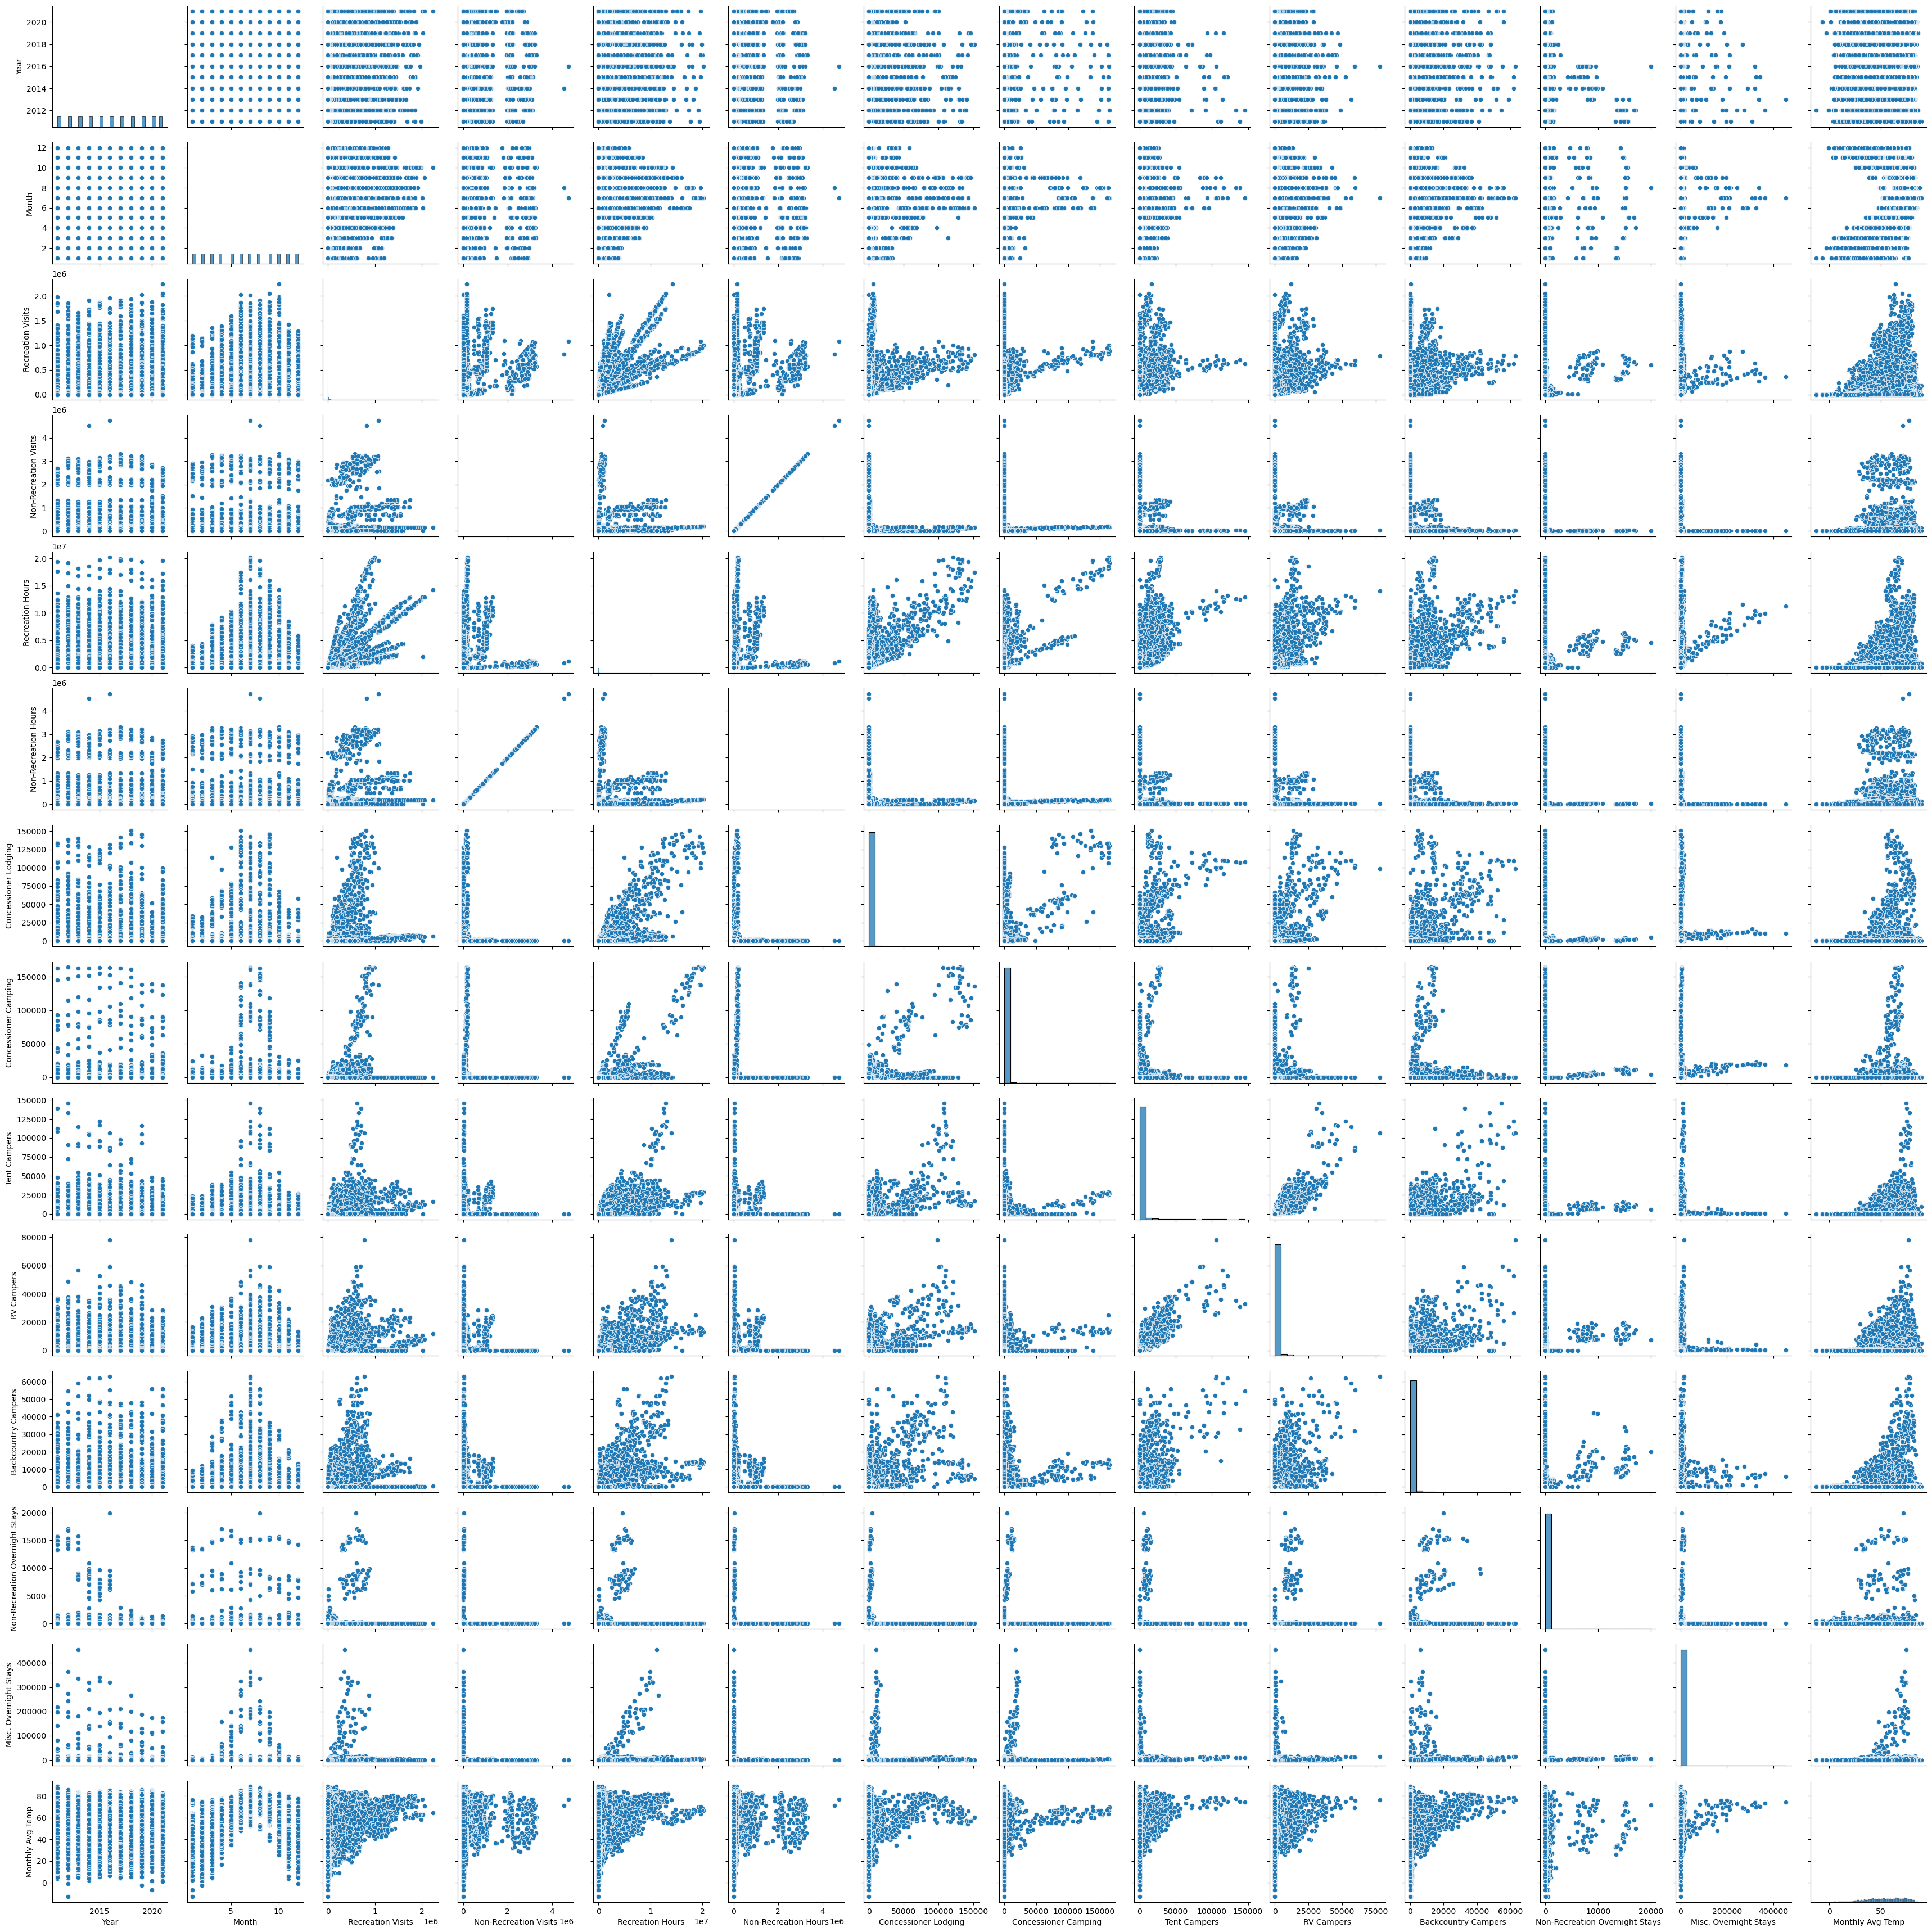

In [21]:
pp = sns.pairplot(df_nps)

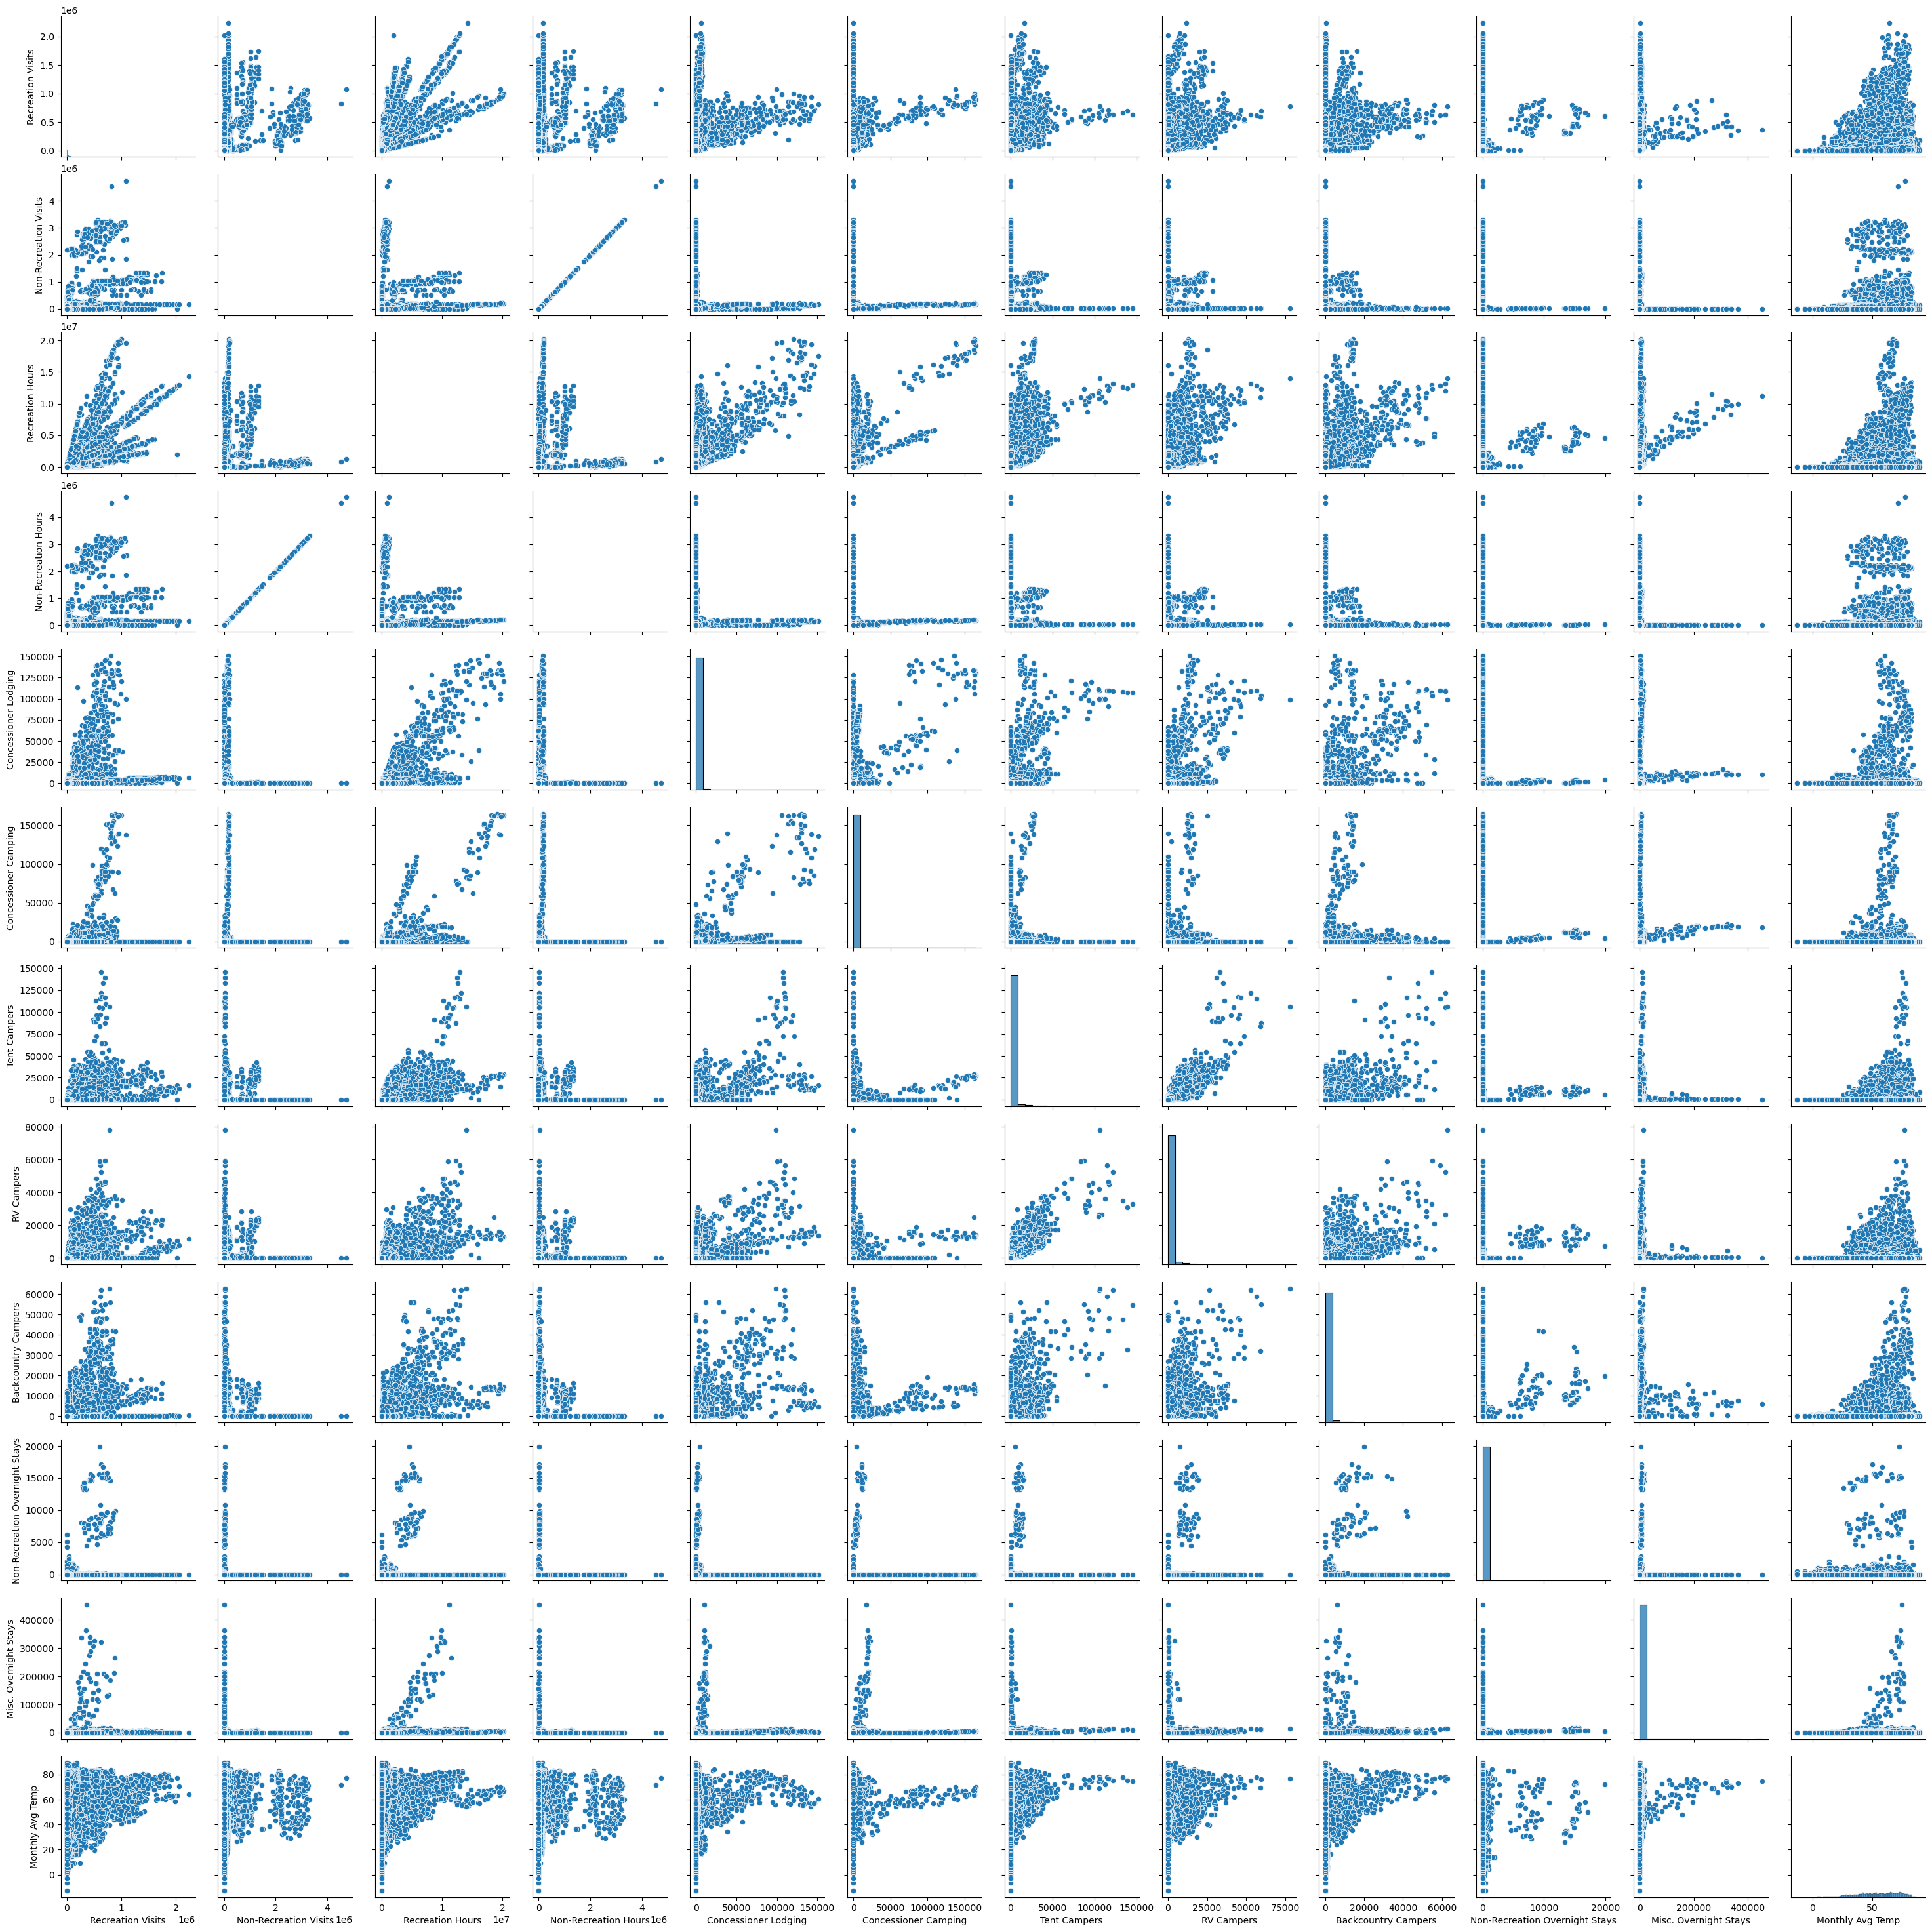

In [22]:
pp2 = sns.pairplot(df_sub)

Based off the the pair plot of the entire dataset I am able to make some sweeping generalizations. 
1. There is mainly positive or no correlation between variables. There are no apparent negative correlations. 
2. All of the charts seem to have outliers with higher values, I should look into what parks are creating these outlier values. 
3. There is heavy seasonality across all of the parks. 
4. The diversity of parks makes data heavily varied and investigations into a by park basis may be helpful in the future. Ie a seperate analysis on National Parks, National Historic Sights, etc. 

## 08. Hypotheses

### 1. There is a relationship between the season and the recreational use of National Park facilities.

### 2. There is a relationship between the season and the popularity of different styles of National Park Facilities. 

### 3. There is a relationship between concessioneer lodging and camping in National Park facilities.

### 4. There is a relationship between the region of a NPS Facility and the volume of campers. 

### 5. There is a relationship between the average temperature and the park usage